## Test Tensorflow Segmentation Model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import scipy.misc as misc
import os
import scipy.misc as misc

import sys
sys.path.insert(0, '../tensorflow')
import models

MODEL_FOLDER='/home/laraujo/work/LearnSegmentation/src/tensorflow/save/model-164'
IMAGE_TEST = '/media/laraujo/BigLinuxPart/Open Datasets/sceneparsing/ADEChallengeData2016/images/training/ADE_train_00014160.jpg'
IMAGE_GT = '/media/laraujo/BigLinuxPart/Open Datasets/sceneparsing/ADEChallengeData2016/annotations/training/ADE_train_00014160.png'

# Parameters
gpu = 0
segmentation_type = 'segnet_connected_gate'

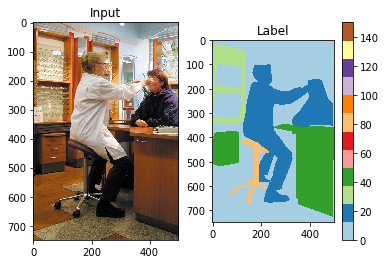

In [7]:
fig = plt.figure()
a=fig.add_subplot(1,2,1)
img_input = misc.imread(IMAGE_TEST)
img_label = misc.imread(IMAGE_GT)
plt.imshow(img_input)
a.set_title('Input')
a=fig.add_subplot(1,2,2)
#plt.imshow(img_label, cmap=cm.Paired ,vmin=np.min(img_label), vmax=np.max(img_label))
plt.imshow(img_label, cmap=cm.Paired ,vmin=0, vmax=150)
#plt.imshow(img_label)
a.set_title('Label')
plt.colorbar()
plt.show()

### Open Tensorflow model

In [3]:
# Set enviroment variable to set the GPU to use
if gpu != -1:
    os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu)
else:
    print('Set tensorflow on CPU')
    os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Build model
if segmentation_type.lower() == 'segnet':
    segmentation_model = models.SegnetNoConnected(training_mode = False)
elif segmentation_type.lower() == 'segnet_connected':
    segmentation_model = models.SegnetConnected(training_mode = False)
elif segmentation_type.lower() == 'segnet_connected_gate':
    segmentation_model = models.SegnetConnectedGate(training_mode = False)
else:
    segmentation_model = models.FullyConvolutionalNetworks(training_mode = False)

# Get Placeholders
model_in = segmentation_model.input
model_out = segmentation_model.output
anotation_prediction = segmentation_model.anotation_prediction

# Load tensorflow model
print("Loading model: %s" % MODEL_FOLDER)
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, MODEL_FOLDER)

Loading model: /home/laraujo/work/LearnSegmentation/src/tensorflow/save/model-164
INFO:tensorflow:Restoring parameters from /home/laraujo/work/LearnSegmentation/src/tensorflow/save/model-164


### Test model on image and display (From training data)

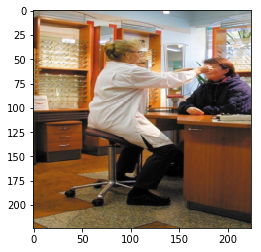

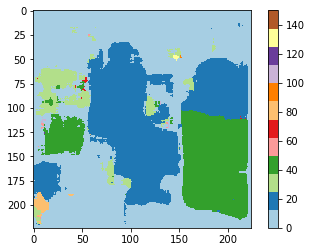

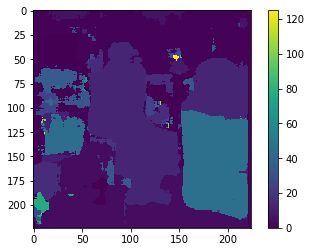

In [8]:
# Resize image to the format expected by the model
img_input = misc.imread(IMAGE_TEST)
img_input = misc.imresize(img_input, [224, 224]) / 255.0
plt.imshow(img_input)
plt.show()

# Run Model with given image
pred = anotation_prediction.eval(feed_dict={model_in: [img_input]})[0]

# Display Results
#plt.imshow(pred, cmap=cm.Paired ,vmin=np.min(pred), vmax=np.max(pred))
plt.imshow(pred, cmap=cm.Paired ,vmin=0, vmax=150)
plt.colorbar()
plt.show()
plt.imshow(pred)
#plt.imshow(pred, cmap='gray')
plt.colorbar()
plt.show()

### Test model on image and display (From Internet)

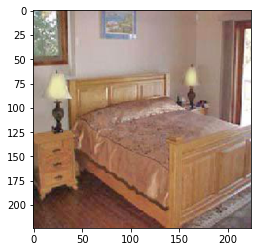

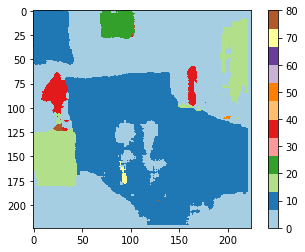

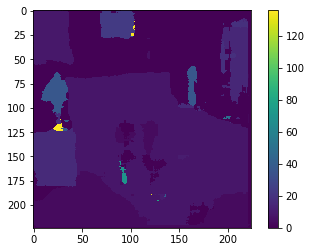

In [13]:
# Resize image to the format expected by the model
img_input = misc.imread('/home/laraujo/work/LearnSegmentation/tests/Bed.png')
#img_input = misc.imread('/home/laraujo/work/LearnSegmentation/tests/house.jpg')
img_input = misc.imresize(img_input, [224, 224]) / 255.0
plt.imshow(img_input)
plt.show()

# Run Model with given image
pred = anotation_prediction.eval(feed_dict={model_in: [img_input]})[0]

# Display Results
#plt.imshow(pred, cmap=cm.Paired ,vmin=np.min(pred), vmax=np.max(pred))
plt.imshow(pred, cmap=cm.Paired ,vmin=0, vmax=80)
plt.colorbar()
plt.show()
plt.imshow(pred)
#plt.imshow(pred, cmap='gray')
plt.colorbar()
plt.show()